# Task: Classification into 4 classes


## Idea is to use CWT images of the data and perform classification using CNNs

# Notes:
- Can't drop nans collectively because of different signal lengths
- 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from biosppy.signals import ecg
from scipy import signal

## Data Import – takes a while

In [8]:


# import X_train.csv dataset into a pandas dataframe
X_train = pd.read_csv("X_train.csv", index_col="id")
y_train = pd.read_csv("y_train.csv", index_col="id")
X_test = pd.read_csv("X_test.csv", index_col="id")

## Get class representatives

In [ ]:
y_train_np = y_train.to_numpy()
ones = np.where(y_train_np == 0)[0]
twos = np.where(y_train_np == 1)[0]
threes = np.where(y_train_np == 2)[0]
fours = np.where(y_train_np == 3)[0]
print(len(ones))
print(len(twos))
print(len(threes))
print(len(fours))

## Double plot function: 
per signal it plots both a few possible templates as well as the average over 180 templates

In [235]:
def plot_features(signal):
    r_peaks = ecg.engzee_segmenter(signal, 300)['rpeaks']
    if len(r_peaks) >= 2:
        beats = ecg.extract_heartbeats(signal, r_peaks, 300)['templates']
        # print("Beats (peaks - 1, 180 proposals of heartbeats): ", beats)
        if len(beats) != 0:
            # for i in range(5):
            #     plt.plot(beats[i])
            #     plt.show()
            mu = np.mean(beats, axis=0) 
            var = np.std(beats, axis=0)
            md = np.median(beats, axis=0)
            
            fig = plt.figure()
            plt.subplot(211)

            ax1 = plt.subplot(211)
            ax1.plot(beats[0,:])
            ax1.plot(beats[1,:])
            ax1.plot(beats[2,:])
            ax1.plot(beats[3,:])
            ax1.set_title("template samples")

            ax2 = plt.subplot(212)
            ax2.set_title("average template")
            ax2.plot(range(mu.shape[0]), mu, label='Average HeartBeat')
            # Fill the variance range
            ax2.fill_between(range(mu.shape[0]), mu - var, mu + var, linewidth=0, alpha=0.1)
            # Plot a median
            ax2.plot(range(md.shape[0]), md,  label='Median HeartBeat', color='#CC4F1B')

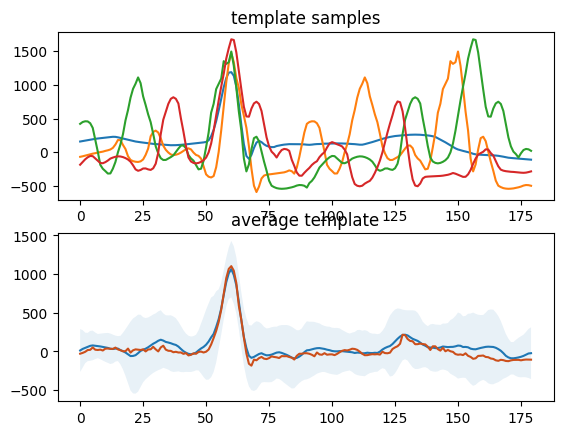

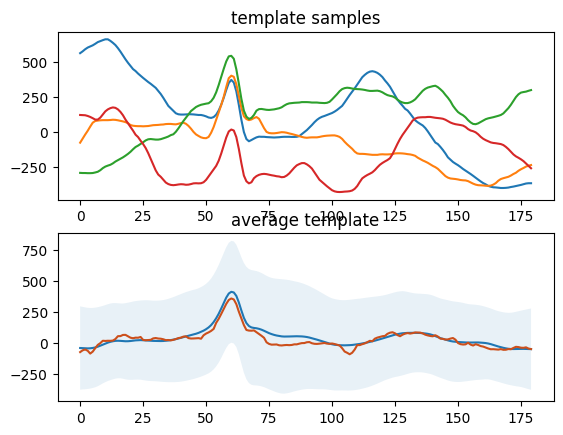

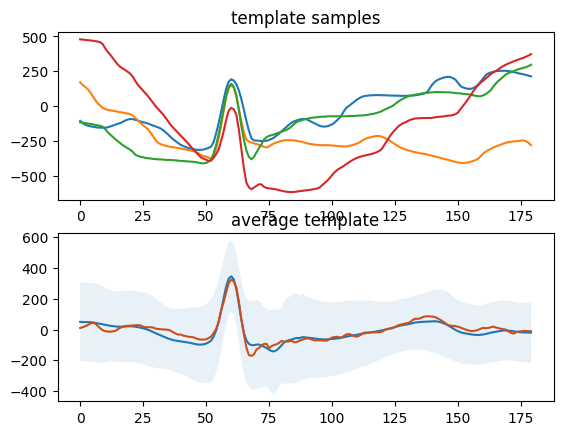

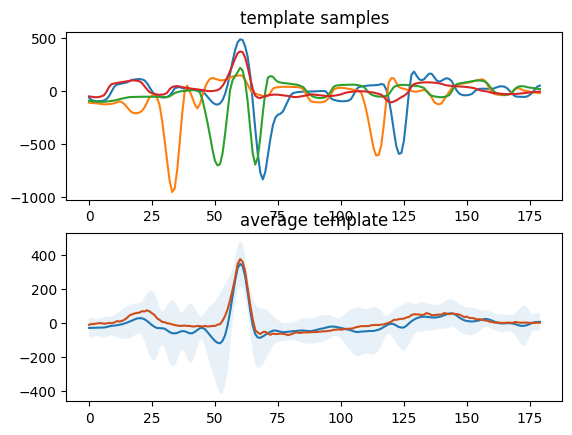

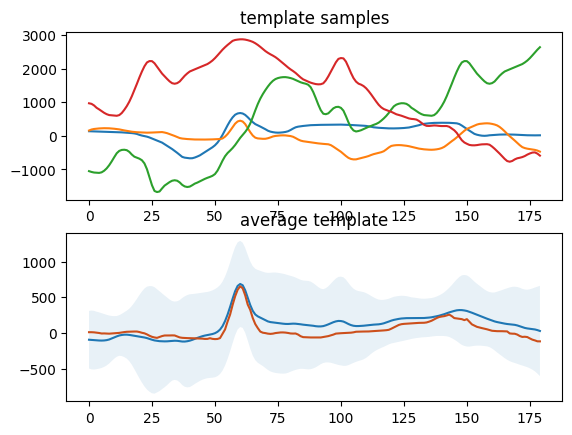

In [237]:
for i in range(5):
    # plot_features(X_train.loc[ones[i]].dropna().to_numpy(dtype="float32"))
    # plot_features(X_train.loc[twos[i]].dropna().to_numpy(dtype="float32"))
    # plot_features(X_train.loc[threes[i]].dropna().to_numpy(dtype="float32"))
    plot_features(X_train.loc[fours[i]].dropna().to_numpy(dtype="float32"))
# plot_features(X_train.loc[0].dropna().to_numpy(dtype="float32"))


In [ ]:
# X_train_trimmed_0 = X_train.loc[0,].dropna().to_numpy(dtype="float32")
# # print("Training data shape: ", X_train.loc[0].dropna().to_numpy(dtype="float32").shape)
# x = np.linspace(0,X_train_trimmed_0.shape[0],X_train_trimmed_0.shape[0])
# plt.plot(x, X_train_trimmed_0)
# plt.show()

## Continuous Wavelet transform:

cwtmatrix shape (30 from width x # signal length
8791
(30, 8791)
8248
(30, 8248)
6333
(30, 6333)
8015
(30, 8015)
8591
(30, 8591)
8469
(30, 8469)
5078
(30, 5078)
8294
(30, 8294)
4322
(30, 4322)
8141
(30, 8141)


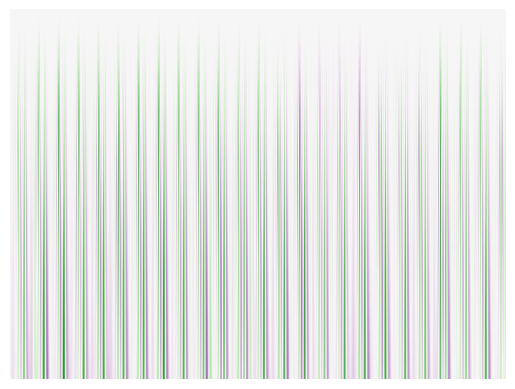

In [268]:
# X_train_trimmed_0 = X_train.loc[1].dropna().to_numpy(dtype="float32")
widths = np.arange(1,31)
print("cwtmatrix shape (30 from width x # signal length")
Class = 4
for i in range(170,180):
        print(len(X_train.loc[ones[i]].dropna().to_numpy(dtype="float32")))
        cwtmatr = signal.cwt(X_train.loc[ones[i]].dropna().to_numpy(dtype="float32"), signal.ricker, widths)
        print(cwtmatr.shape)
        plt.imshow(cwtmatr, extent=[-1, 1, 31, 1], cmap='PRGn', aspect='auto',
                vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
        plt.axis('off')
        # plt.show()
        plt.savefig("4/cwtmatr_class{}_index{}.png".format(Class, i), bbox_inches='tight', pad_inches=0)